<a href="https://colab.research.google.com/github/LucjanSakowicz/data-science-bootcamp/blob/main/07_uczenie_glebokie/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Klasyfikator wieloklasowy - Digit Recognition
### Tensorflow
>Strona biblioteki: [https://www.tensorflow.org/](https://www.tensorflow.org/)  
>Dokumentacja: [https://www.tensorflow.org/api_docs](https://www.tensorflow.org/api_docs)  
>
>Szybko rozwijająca się biblioteka do uczenia maszynowego i uczenia głębokiego rozwijana przez Google.
>
>Aby zainstalować bibliotekę tensorflow, użyj polecenia poniżej:
```
pip install tensorflow
```

### Keras
>Strona biblioteki: [https://keras.io/](https://keras.io/)  
>
>Wysokopoziomowy interfejs do budowy sieci neuronowych. Działa zarówno na Tensorflow, Theano oraz CNTK.
>
>Aby zainstalować bibliotekę keras, użyj polecenia poniżej:
```
pip install keras
```

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
1. [Import bibliotek](#a2)
2. [Załadowanie i przygotowanie danych](#a3)
3. [Eksploracja danych](#a4)
4. [Budowa sieci neuronowej](#a5)    
5. [Trenowanie modelu](#a6)
6. [Ocena modelu](#a7)
7. [Predykcja na podstawie modelu](#a8)

![architecture.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/architecture.jpg)
![perceptron.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron.jpg)
![perceptron_2.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron_2.jpg)
![multi.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/multi.jpg)
![impl_1.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/impl_1.jpg)


### <a name='a1'></a> Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.
>
> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów). 



### <a name='a2'></a> Import bibliotek

In [1]:
# Użyj poniższego polecenia jeśli używasz innego środowiska niż Google Colab
# !pip install --upgrade -q tensorflow

# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version 2.x  

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.12.0


### <a name='a3'></a> Załadowanie i przygotowanie danych

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [5]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [6]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='a4'></a>  Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

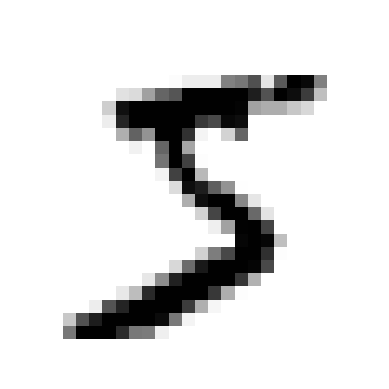

In [7]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

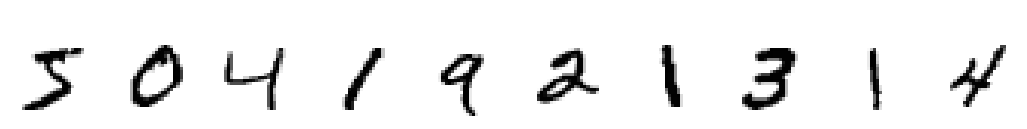

In [8]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='white', fontsize=16)
plt.show()

### <a name='a5'></a>  Budowa sieci neuronowej

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='a6'></a> Trenowanie modelu

In [10]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2988 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1459 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1099 - accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0917 - accuracy: 0.9718
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0781 - accuracy: 0.9753


### <a name='a7'></a> Ocena modelu

In [11]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0816 - accuracy: 0.9732 - 834ms/epoch - 3ms/step


[0.08157181739807129, 0.9732000231742859]

In [12]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.298800,0.913750
1,0.145941,0.956600
2,0.109876,0.966433
3,0.091660,0.971783
4,0.078131,0.975333


In [13]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

### <a name='a8'></a> Predykcja na podstawie modelu

In [14]:
model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


array([[0.000000124864, 0.000000007929, 0.000000135161, ..., 0.9998107     , 0.000010723818, 0.000010184441],
       [0.000000123499, 0.00010365967 , 0.99989134    , ..., 0.            , 0.000001604805, 0.            ],
       [0.000000799604, 0.9978677     , 0.00006801259 , ..., 0.0018728774  , 0.0001446576  , 0.000000568459],
       ...,
       [0.000000000679, 0.00000000004 , 0.000000000023, ..., 0.000058245034, 0.00000085615 , 0.000017193637],
       [0.00000000661 , 0.000000099401, 0.000000000069, ..., 0.000000004502, 0.0002435129  , 0.000000000008],
       [0.000000011411, 0.000000000002, 0.000000005207, ..., 0.000000000001, 0.000000000185, 0.000000000012]],
      dtype=float32)

In [21]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [22]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [23]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([33, 151, 241, 247, 259, 320, 321, 340, 381, 445], dtype='int64')

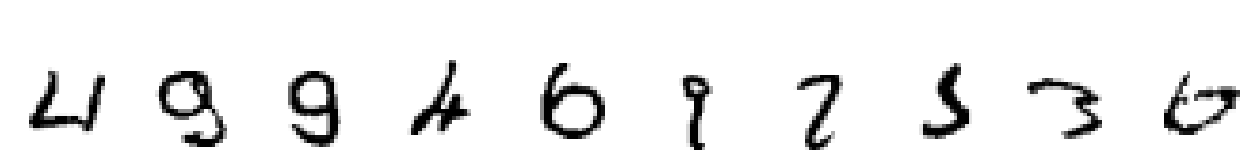

In [24]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='white', fontsize=12)
plt.show()